In [6]:
from datetime import datetime
import re
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import pandas as pd 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import wiki 
import stock
from scipy.stats import norm
import ppscore as pp
import twitterscraper
sia = SentimentIntensityAnalyzer()

In [8]:
start_date = datetime.date(2015,7,1)
wiki_list = ['Facebook.wiki','Google.wiki','Microsoft.wiki','Amazon (company).wiki','Apple Inc..wiki']
ticker_list = ['FB','GOOGL','MSFT','AMZN','AAPL'] 

TypeError: descriptor 'date' requires a 'datetime.datetime' object but received a 'int'

In [5]:
df_wiki_pv = wiki.wiki_extractor()
df_wiki_pv = df_wiki_pv[['Date'] + wiki_list]
df_wiki_pv = df_wiki_pv[df_wiki_pv['Date']>= pd.to_datetime(start_date)]
df_wiki_pv.info()
print(df_wiki_pv['Date'].max())

NameError: name 'start_date' is not defined

In [4]:
df_wiki_pv.head()

,Date,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki
0,2015-07-01,50697,48461,7479,1,11551
1,2015-07-02,99060,47677,7671,1,12192
2,2015-07-03,45756,44945,6418,0,10946
3,2015-07-04,42347,40774,5829,0,9718
4,2015-07-05,46149,42162,6086,1,10826


In [5]:
df_wiki_pv.tail()

,Date,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki
1860,2020-08-03,17430,26244,11438,14084,12808
1861,2020-08-04,16527,18095,9991,13940,13311
1862,2020-08-05,16654,19028,8099,14449,13297
1863,2020-08-06,14263,16961,7288,14864,12109
1864,2020-08-07,13744,15969,7916,14509,12518


In [6]:
df_wiki_pv.corr()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki
Facebook.wiki,1.000000,0.463351,0.106756,-0.275827,0.094944
Google.wiki,0.463351,1.000000,0.092504,-0.183482,0.137132
Microsoft.wiki,0.106756,0.092504,1.000000,0.062923,0.326409
Amazon (company).wiki,-0.275827,-0.183482,0.062923,1.000000,0.063228
Apple Inc..wiki,0.094944,0.137132,0.326409,0.063228,1.000000


In [7]:
num_days =  datetime.date(2020,8,7) - start_date
print(num_days.days + 1)
print('Num_days Checked for wiki PV')

1865
Num_days Checked for wiki PV


[*********************100%***********************]  5 of 5 completed


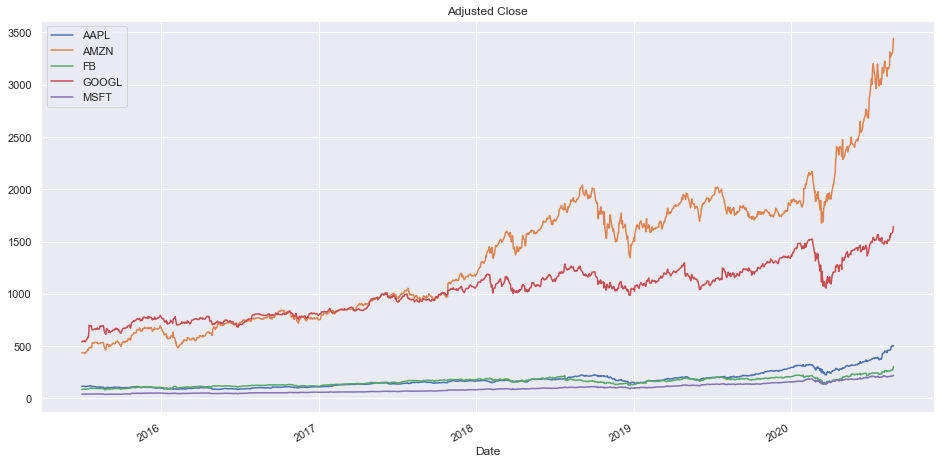

In [8]:
df_stock = stock.stock_extractor_day(start_date)

In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2015-06-30 to 2020-08-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1300 non-null   float64
 1   AMZN    1300 non-null   float64
 2   FB      1300 non-null   float64
 3   GOOGL   1300 non-null   float64
 4   MSFT    1300 non-null   float64
dtypes: float64(5)
memory usage: 60.9 KB


In [10]:
df_stock.head()

,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2015-06-30,115.389328,434.089996,85.769997,540.039978,39.860466
2015-07-01,116.465683,437.390015,86.910004,543.299988,40.131306
2015-07-02,116.318474,437.709991,87.290001,547.340027,40.086163
2015-07-06,115.913704,436.040009,87.550003,545.619995,40.077141
2015-07-07,115.628525,436.720001,87.220001,550.030029,39.995888


<AxesSubplot:>

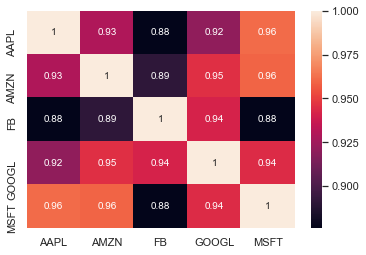

In [15]:
sns.heatmap(df_stock.corr(),annot=True)

In [11]:
df_stock.corr()

,AAPL,AMZN,FB,GOOGL,MSFT
AAPL,1.000000,0.929335,0.875818,0.920804,0.961319
AMZN,0.929335,1.000000,0.891204,0.946096,0.959648
FB,0.875818,0.891204,1.000000,0.941756,0.876153
GOOGL,0.920804,0.946096,0.941756,1.000000,0.944418
MSFT,0.961319,0.959648,0.876153,0.944418,1.000000


In [30]:
df_wiki_pv = df_wiki_pv.set_index('Date')
df_wiki_pv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1865 entries, 2015-07-01 to 2020-08-07
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Facebook.wiki          1865 non-null   int64
 1   Google.wiki            1865 non-null   int64
 2   Microsoft.wiki         1865 non-null   int64
 3   Amazon (company).wiki  1865 non-null   int64
 4   Apple Inc..wiki        1865 non-null   int64
dtypes: int64(5)
memory usage: 87.4 KB


In [31]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1297 entries, 2015-06-30 to 2020-08-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1297 non-null   float64
 1   AMZN    1297 non-null   float64
 2   FB      1297 non-null   float64
 3   GOOGL   1297 non-null   float64
 4   MSFT    1297 non-null   float64
dtypes: float64(5)
memory usage: 60.8 KB


In [59]:
df = df_wiki_pv.merge(df_stock, left_index = True, right_index = True, how = 'inner' )
df.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,,,,,,
2015-07-01,50697,48461,7479,1,11551,116.465683,437.390015,86.910004,543.299988,40.131306
2015-07-02,99060,47677,7671,1,12192,116.318474,437.709991,87.290001,547.340027,40.086163
2015-07-06,46947,46533,7491,2,11711,115.913704,436.040009,87.550003,545.619995,40.077141
2015-07-07,45924,47695,7518,3,13505,115.628525,436.720001,87.220001,550.030029,39.995888
2015-07-08,45403,45521,10472,1,14554,112.758286,429.700012,85.650002,541.700012,39.941715


In [60]:
df.tail()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,,,,,,
2020-08-03,17430,26244,11438,14084,12808,434.965759,3111.889893,251.960007,1482.760010,216.017807
2020-08-04,16527,18095,9991,13940,13311,437.870514,3138.830078,249.830002,1473.300049,212.775650
2020-08-05,16654,19028,8099,14449,13297,439.457642,3205.030029,249.119995,1479.089966,212.426498
2020-08-06,14263,16961,7288,14864,12109,454.790009,3225.000000,265.279999,1504.949951,215.828278
2020-08-07,13744,15969,7916,14509,12518,444.450012,3167.459961,268.440002,1498.369995,211.967606


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Facebook.wiki          1286 non-null   int64  
 1   Google.wiki            1286 non-null   int64  
 2   Microsoft.wiki         1286 non-null   int64  
 3   Amazon (company).wiki  1286 non-null   int64  
 4   Apple Inc..wiki        1286 non-null   int64  
 5   AAPL                   1286 non-null   float64
 6   AMZN                   1286 non-null   float64
 7   FB                     1286 non-null   float64
 8   GOOGL                  1286 non-null   float64
 9   MSFT                   1286 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 110.5 KB


In [62]:
def reutrn_to_label_modifier(x): 
    if x>0.01: 
        return 1
    if x< -0.01: 
        return -1 
    if x<= 0.01 and x>= -0.01: 
        return 0

In [63]:
for tickers in ticker_list: 
    df[tickers + '_return'] = df[tickers].pct_change()
    df[tickers + '_change'] = df[tickers + '_return'].apply(lambda x: reutrn_to_label_modifier(x))

In [64]:
# return validation 
# how much percentage change of the price, comparing to yesterday 
# percetage change in the price is available same time once the price is available 
print((df['FB'][1]  - df['FB'][0])/df['FB'][0])

0.004372307414636989


In [65]:
df.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,FB_return,FB_change,GOOGL_return,GOOGL_change,MSFT_return,MSFT_change,AMZN_return,AMZN_change,AAPL_return,AAPL_change
Date,,,,,,,,,,,,,,,,,,,,
2015-07-01,50697,48461,7479,1,11551,116.465683,437.390015,86.910004,543.299988,40.131306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,99060,47677,7671,1,12192,116.318474,437.709991,87.290001,547.340027,40.086163,0.004372,0.0,0.007436,0.0,-0.001125,0.0,0.000732,0.0,-0.001264,0.0
2015-07-06,46947,46533,7491,2,11711,115.913704,436.040009,87.550003,545.619995,40.077141,0.002979,0.0,-0.003143,0.0,-0.000225,0.0,-0.003815,0.0,-0.003480,0.0
2015-07-07,45924,47695,7518,3,13505,115.628525,436.720001,87.220001,550.030029,39.995888,-0.003769,0.0,0.008083,0.0,-0.002027,0.0,0.001559,0.0,-0.002460,0.0
2015-07-08,45403,45521,10472,1,14554,112.758286,429.700012,85.650002,541.700012,39.941715,-0.018000,-1.0,-0.015145,-1.0,-0.001354,0.0,-0.016074,-1.0,-0.024823,-1.0


In [66]:
for tickers in wiki_list:
    n = 1 
    while n <= 3: 
        df[tickers + '_t-' + str(n)] = df[tickers].shift(n)
        n += 1 
df.head()

,Facebook.wiki,Google.wiki,Microsoft.wiki,Amazon (company).wiki,Apple Inc..wiki,AAPL,AMZN,FB,GOOGL,MSFT,...,Google.wiki_t-3,Microsoft.wiki_t-1,Microsoft.wiki_t-2,Microsoft.wiki_t-3,Amazon (company).wiki_t-1,Amazon (company).wiki_t-2,Amazon (company).wiki_t-3,Apple Inc..wiki_t-1,Apple Inc..wiki_t-2,Apple Inc..wiki_t-3
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,50697,48461,7479,1,11551,116.465683,437.390015,86.910004,543.299988,40.131306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,99060,47677,7671,1,12192,116.318474,437.709991,87.290001,547.340027,40.086163,...,NaN,7479.0,NaN,NaN,1.0,NaN,NaN,11551.0,NaN,NaN
2015-07-06,46947,46533,7491,2,11711,115.913704,436.040009,87.550003,545.619995,40.077141,...,NaN,7671.0,7479.0,NaN,1.0,1.0,NaN,12192.0,11551.0,NaN
2015-07-07,45924,47695,7518,3,13505,115.628525,436.720001,87.220001,550.030029,39.995888,...,48461.0,7491.0,7671.0,7479.0,2.0,1.0,1.0,11711.0,12192.0,11551.0
2015-07-08,45403,45521,10472,1,14554,112.758286,429.700012,85.650002,541.700012,39.941715,...,47677.0,7518.0,7491.0,7671.0,3.0,2.0,1.0,13505.0,11711.0,12192.0


In [67]:
for tickers in ticker_list: 
    n = 1
    while n <= 3: 
        df[tickers + '_return' + '_t-' + str(n)] = df[tickers + '_return'].shift(n)
        n += 1

In [68]:
df[['GOOGL_return_t-3','GOOGL_return_t-2','GOOGL_return_t-1','GOOGL_return']].head()

,GOOGL_return_t-3,GOOGL_return_t-2,GOOGL_return_t-1,GOOGL_return
Date,,,,
2015-07-01,NaN,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN,0.007436
2015-07-06,NaN,NaN,0.007436,-0.003143
2015-07-07,NaN,0.007436,-0.003143,0.008083
2015-07-08,0.007436,-0.003143,0.008083,-0.015145


In [75]:
print(df['GOOGL_return_t-1'].diff())
print(-0.003143 - 0.007436)

Date
2015-07-01         NaN
2015-07-02         NaN
2015-07-06         NaN
2015-07-07   -0.010579
2015-07-08    0.011225
                ...   
2020-08-03   -0.042529
2020-08-04    0.029287
2020-08-05   -0.002892
2020-08-06    0.010310
2020-08-07    0.013554
Name: GOOGL_return_t-1, Length: 1286, dtype: float64
-0.010579


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Facebook.wiki              1286 non-null   int64  
 1   Google.wiki                1286 non-null   int64  
 2   Microsoft.wiki             1286 non-null   int64  
 3   Amazon (company).wiki      1286 non-null   int64  
 4   Apple Inc..wiki            1286 non-null   int64  
 5   AAPL                       1286 non-null   float64
 6   AMZN                       1286 non-null   float64
 7   FB                         1286 non-null   float64
 8   GOOGL                      1286 non-null   float64
 9   MSFT                       1286 non-null   float64
 10  FB_return                  1285 non-null   float64
 11  FB_change                  1285 non-null   float64
 12  GOOGL_return               1285 non-null   float64
 13  GOOGL_change               128

In [88]:
# generate the wiki _diff 
wiki_t_n =  [x for x  in  list(df.columns) if  'wiki' in x and '-' in x]
#print(wiki_t_n)
for i in range(len(wiki_t_n)): 
    number = wiki_t_n[i][-1]
    #print(str(number+1))
    df[wiki_t_n[i] + '_t-' + str(int(number)+1)] = df[wiki_t_n[i]].diff()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1286 entries, 2015-07-01 to 2020-08-07
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Facebook.wiki                  1286 non-null   int64  
 1   Google.wiki                    1286 non-null   int64  
 2   Microsoft.wiki                 1286 non-null   int64  
 3   Amazon (company).wiki          1286 non-null   int64  
 4   Apple Inc..wiki                1286 non-null   int64  
 5   AAPL                           1286 non-null   float64
 6   AMZN                           1286 non-null   float64
 7   FB                             1286 non-null   float64
 8   GOOGL                          1286 non-null   float64
 9   MSFT                           1286 non-null   float64
 10  FB_return                      1285 non-null   float64
 11  FB_change                      1285 non-null   float64
 12  GOOGL_return                  

In [97]:
df[['Apple Inc..wiki_t-1','Apple Inc..wiki_t-2','Apple Inc..wiki_t-3','Apple Inc..wiki_t-1_t-2','Apple Inc..wiki_t-2_t-3']].head()

,Apple Inc..wiki_t-1,Apple Inc..wiki_t-2,Apple Inc..wiki_t-3,Apple Inc..wiki_t-1_t-2,Apple Inc..wiki_t-2_t-3
Date,,,,,
2015-07-01,NaN,NaN,NaN,NaN,NaN
2015-07-02,11551.0,NaN,NaN,NaN,NaN
2015-07-06,12192.0,11551.0,NaN,641.0,NaN
2015-07-07,11711.0,12192.0,11551.0,-481.0,641.0
2015-07-08,13505.0,11711.0,12192.0,1794.0,-481.0


In [99]:
print(12192.0 - 11551.0)
print(11711.0 - 12192.0)

641.0
-481.0


In [100]:
df = df.dropna()

In [101]:
df.to_csv('financial_wiki_2017_07_08.csv')

In [102]:
train_test_split = 0.75 
total_days = len(df.index)
split_week = df.index[round(total_days*(train_test_split))]
train = df[df.index <= split_week]
test = df[df.index > split_week]
print(train.shape)
print(test.shape)

(963, 65)
(319, 65)


# Exploration can only be carried on Training set, otherwise 砍手

## Predictive power screening

In [103]:
predictors = []
for col in list(train.columns): 
    if col[-2] == '-': 
        predictors.append(col)
predictors 

['Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'Amazon (company).wiki_t-1',
 'Amazon (company).wiki_t-2',
 'Amazon (company).wiki_t-3',
 'Apple Inc..wiki_t-1',
 'Apple Inc..wiki_t-2',
 'Apple Inc..wiki_t-3',
 'FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3',
 'AMZN_return_t-1',
 'AMZN_return_t-2',
 'AMZN_return_t-3',
 'AAPL_return_t-1',
 'AAPL_return_t-2',
 'AAPL_return_t-3',
 'Facebook.wiki_t-1_t-2',
 'Facebook.wiki_t-2_t-3',
 'Facebook.wiki_t-3_t-4',
 'Google.wiki_t-1_t-2',
 'Google.wiki_t-2_t-3',
 'Google.wiki_t-3_t-4',
 'Microsoft.wiki_t-1_t-2',
 'Microsoft.wiki_t-2_t-3',
 'Microsoft.wiki_t-3_t-4',
 'Amazon (company).wiki_t-1_t-2',
 'Amazon (company).wiki_t-2_t-3',
 'Amazon (company).wiki_t-3_t-4',
 'Apple Inc..

In [104]:
google_wiki_explore = train[['GOOGL_change'] + predictors]
google_wiki_explore['GOOGL_change'] = google_wiki_explore['GOOGL_change'].astype('category')

In [105]:
for col in list(google_wiki_explore.columns)[1:]:
    print(col, pp.score(google_wiki_explore, col, "GOOGL_change")['ppscore'])

Facebook.wiki_t-1 0
Facebook.wiki_t-2 0
Facebook.wiki_t-3 0
Google.wiki_t-1 0
Google.wiki_t-2 0
Google.wiki_t-3 0
Microsoft.wiki_t-1 0
Microsoft.wiki_t-2 0
Microsoft.wiki_t-3 0.002021181808597194
Amazon (company).wiki_t-1 0.04753339152632096
Amazon (company).wiki_t-2 0.043123238513124905
Amazon (company).wiki_t-3 0.06229325178915945
Apple Inc..wiki_t-1 0
Apple Inc..wiki_t-2 0.029357027729547
Apple Inc..wiki_t-3 0
FB_return_t-1 0
FB_return_t-2 0.005911903377333321
FB_return_t-3 0
GOOGL_return_t-1 0
GOOGL_return_t-2 0
GOOGL_return_t-3 0
MSFT_return_t-1 0
MSFT_return_t-2 0
MSFT_return_t-3 0.012495751090725905
AMZN_return_t-1 0
AMZN_return_t-2 0
AMZN_return_t-3 0
AAPL_return_t-1 0
AAPL_return_t-2 0
AAPL_return_t-3 0
Facebook.wiki_t-1_t-2 0
Facebook.wiki_t-2_t-3 0
Facebook.wiki_t-3_t-4 0
Google.wiki_t-1_t-2 0.005107046207995437
Google.wiki_t-2_t-3 0
Google.wiki_t-3_t-4 0
Microsoft.wiki_t-1_t-2 0
Microsoft.wiki_t-2_t-3 0
Microsoft.wiki_t-3_t-4 0
Amazon (company).wiki_t-1_t-2 0.07252479752366

In [106]:
# Feature PPS stability screening 
# Does the predicitve power sustain as we shift the window size ? 
# Relationship in the real-world does not stay as it is

In [81]:
# What financial data we need to use ? 

## 分割线

In [ ]:
tiwtter_list = ['/amazon_tweets.csv','','','']

In [7]:
amazn_tweet = pd.read_csv('/Users/ball4308/Desktop/MSc BA/BA Report /Sentiment Data Source/amazon_tweets.csv')
amazn_tweet.timestamp =  pd.to_datetime(amazn_tweet.timestamp)
amazn_tweet['date'] = amazn_tweet['timestamp'].apply(lambda x: x.date())
amazn_tweet.head()

,timestamp,text,username,date
0,2017-01-01 12:36:00,Amazon looks to the sky to store products: htt...,Reuters,2017-01-01
1,2017-01-01 12:36:00,Amazon looks to the sky to store products: htt...,Reuters,2017-01-01
2,2017-01-03 16:14:07,How does Amazon's Alexa have a role in deep sp...,Financial Times,2017-01-03
3,2017-01-04 11:19:30,Amazon doubles deliveries in 2016 for third-pa...,Reuters,2017-01-04
4,2017-01-04 17:43:26,"Today’s traveling salesmen: giant RVs, barcode...",The Wall Street Journal,2017-01-04


In [8]:
print(amazn_tweet[amazn_tweet.columns[-2]].unique())
print(amazn_tweet['date'].nunique())

['Reuters' 'Financial Times' 'The Wall Street Journal' 'BBC Business'
 'MarketWatch Economy' 'Bloomberg LP']
1025


In [9]:
amazn_tweets_coverage = amazn_tweet['date'].nunique() / (365*3)
amazn_tweets_coverage

0.9360730593607306

In [10]:
fb_tweet = pd.read_csv('/Users/ball4308/Desktop/MSc BA/BA Report /Sentiment Data Source/fb_tweets.csv')
fb_tweet.timestamp =  pd.to_datetime(fb_tweet.timestamp)
fb_tweet['date'] = fb_tweet['timestamp'].apply(lambda x: x.date())
fb_tweet.head()

,timestamp,text,username,date
0,2017-01-03 05:37:20,Adtech funding drops amid Facebook-Google duop...,Financial Times,2017-01-03
1,2017-01-05 19:20:14,Chicago Police Weigh Hate-Crime Charges in Fac...,The Wall Street Journal,2017-01-05
2,2017-01-06 19:55:55,Facebook appoints former CNN anchor to media r...,Financial Times,2017-01-06
3,2017-01-07 00:35:04,Four ordered held without bail over Chicago to...,Reuters,2017-01-07
4,2017-01-07 05:05:07,Four ordered held without bail over Chicago to...,Reuters,2017-01-07


In [11]:
print(fb_tweet[fb_tweet.columns[-2]].unique())
print(fb_tweet['date'].nunique())

['Financial Times' 'The Wall Street Journal' 'Reuters' 'Bloomberg LP']
1044


In [12]:
fb_tweets_coverage = fb_tweet['date'].nunique() / (365*3)
fb_tweets_coverage

0.9534246575342465

In [13]:
google_tweet = pd.read_csv('/Users/ball4308/Desktop/MSc BA/BA Report /Sentiment Data Source/google_tweets.csv')
google_tweet.timestamp =  pd.to_datetime(google_tweet.timestamp)
google_tweet['date'] = google_tweet['timestamp'].apply(lambda x: x.date())
google_tweet.head()

,timestamp,text,username,date
0,2017-01-03 00:11:04,"""It’s very hard to be sad or serious…and to co...",The Wall Street Journal,2017-01-03
1,2017-01-03 05:52:45,Adtech funding drops amid Facebook-Google duop...,Financial Times,2017-01-03
2,2017-01-04 11:24:06,Google is to launch a tool to enable small bus...,The Wall Street Journal,2017-01-04
3,2017-01-04 17:28:05,"The making of virtually real art, with Google'...",The New York Times,2017-01-04
4,2017-01-05 01:05:05,U.S. Labor department sues Google for compensa...,Reuters,2017-01-05


In [14]:
print(google_tweet[google_tweet.columns[-2]].unique())
print(google_tweet['date'].nunique())

['The Wall Street Journal' 'Financial Times' 'The New York Times'
 'Reuters' 'CNN' 'BBC Business' 'The Economist' 'BBC Breaking News'
 'MarketWatch Economy']
1079


In [15]:
google_tweets_coverage = google_tweet['date'].nunique() / (365*3)
google_tweets_coverage

0.9853881278538813

In [16]:
print('fb',fb_tweet[fb_tweet.columns[-2]].unique())

print('google',google_tweet[google_tweet.columns[-2]].unique())

print('amazon',amazn_tweet[amazn_tweet.columns[-1]].unique())

fb ['Financial Times' 'The Wall Street Journal' 'Reuters' 'Bloomberg LP']
google ['The Wall Street Journal' 'Financial Times' 'The New York Times'
 'Reuters' 'CNN' 'BBC Business' 'The Economist' 'BBC Breaking News'
 'MarketWatch Economy']
amazon [datetime.date(2017, 1, 1) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 4) ... datetime.date(2020, 8, 4)
 datetime.date(2020, 8, 5) datetime.date(2020, 8, 6)]


In [17]:
print(len(list(sia.lexicon.keys())))

7506


In [18]:
positive_table = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',sheet_name = 'Positive')
positive = list(positive_table[positive_table.columns[0]].values) + list(positive_table.columns[0])
print(len(positive))

357


In [19]:
negative_table = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',sheet_name = 'Negative')
negative = list(negative_table[negative_table.columns[0]].values) + list(negative_table.columns[0])
print(len(negative))

2361


In [20]:
neutral_table = pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx',sheet_name = 'Uncertainty')
neutral = list(neutral_table[neutral_table.columns[0]].values) + list(neutral_table.columns[0])
print(len(neutral))

304


In [21]:
final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update({word:-2.0 for word in neutral})
#final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex
print(len(list(sia.lexicon.keys())))

10478


In [22]:
def sentiment_analyzer_scores(sentence,sia):
    score = sia.polarity_scores(sentence)
    #print("{} {}".format(sentence, str(score)))
    return score 

In [23]:
sentiment_analyzer_scores(google_tweet['text'][2000],sia)

{'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.7096}

In [24]:
sentiment_analyzer_scores("Google employees brainstormed, but didn't implement, ways to alter search functions to counter Trump's 2017 travel ban, internal emails show",sia)

{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.7096}

In [25]:
google_tweet['text'][2000]

"Google employees brainstormed, but didn't implement, ways to alter search functions to counter Trump's 2017 travel ban, internal emails show https://on.wsj.com/2DhIjcj\xa0"

In [26]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    try: 
        sample = re.sub(r"http\S+", "", sample)
        index = sample.index('\xa0')
        sample = sample[:index-1]
        return sample 
    except ValueError:
        return re.sub(r"http\S+", "", sample)

In [27]:
remove_URL(google_tweet['text'][6])

"The making of virtually real art, with Google's Tilt Brush"

In [28]:
 google_tweet['text'] =   google_tweet['text'].apply(lambda x: remove_URL(x))

In [29]:
for item in ['pos','neg','neu','compound']: 
    google_tweet[item] = google_tweet['text'].apply(lambda x: sentiment_analyzer_scores(x,sia)[item])

In [30]:
google_tweet.head()

,timestamp,text,username,date,pos,neg,neu,compound
0,2017-01-03 00:11:04,"""It’s very hard to be sad or serious…and to co...",The Wall Street Journal,2017-01-03,0.000,0.21,0.790,-0.5849
1,2017-01-03 05:52:45,Adtech funding drops amid Facebook-Google duopoly,Financial Times,2017-01-03,0.000,0.00,1.000,0.0000
2,2017-01-04 11:24:06,Google is to launch a tool to enable small bus...,The Wall Street Journal,2017-01-04,0.241,0.00,0.759,0.6597
3,2017-01-04 17:28:05,"The making of virtually real art, with Google'...",The New York Times,2017-01-04,0.000,0.00,1.000,0.0000
4,2017-01-05 01:05:05,U.S. Labor department sues Google for compensa...,Reuters,2017-01-05,0.000,0.00,1.000,0.0000


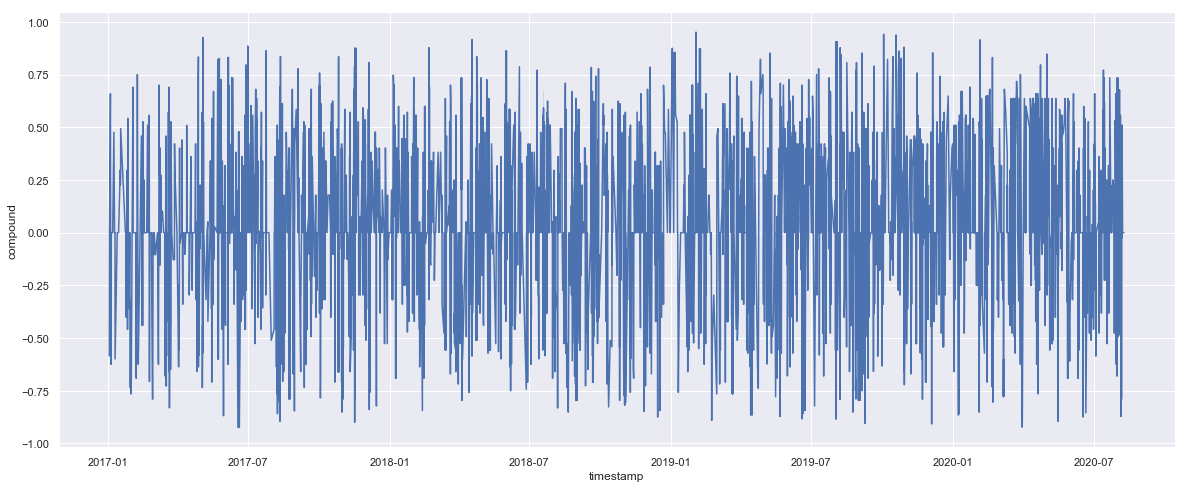

In [31]:
plt.figure(figsize=(20,8))
sns.lineplot(x="timestamp", y="compound",
             #hue="region", style="event",
             data=google_tweet)

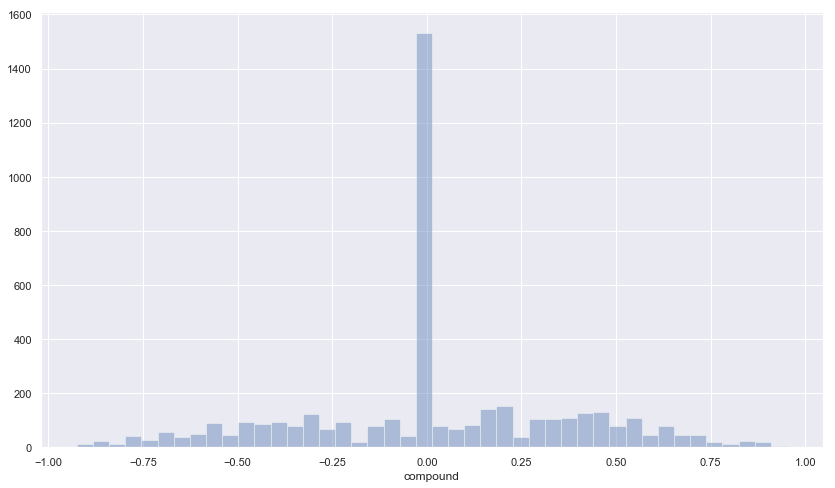

In [32]:

plt.figure(figsize=(14,8))
sns.distplot(google_tweet['compound'], kde = False)

In [33]:
mean_table = google_tweet.groupby('date').mean()[['pos','neg','neu','compound']]
mean_table.describe()

,pos,neg,neu,compound
count,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.077962,0.065290,0.856743,0.035409
std,0.079183,0.081812,0.104482,0.271542
min,0.000000,0.000000,0.326000,-0.924600
25%,0.000000,0.000000,0.798875,-0.101975
50%,0.063000,0.038667,0.863500,0.000000
75%,0.118767,0.103100,0.928000,0.177900
max,0.625000,0.674000,1.000000,0.875000


In [34]:
max_table = google_tweet.groupby('date').max()[['pos','neg','neu','compound']]
max_table.describe()

,pos,neg,neu,compound
count,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.152281,0.140819,0.935380,0.263343
std,0.124363,0.142448,0.108856,0.338983
min,0.000000,0.000000,0.326000,-0.924600
25%,0.000000,0.000000,0.890500,0.000000
50%,0.155000,0.119000,1.000000,0.296000
75%,0.236000,0.242500,1.000000,0.526700
max,0.625000,0.674000,1.000000,0.951700


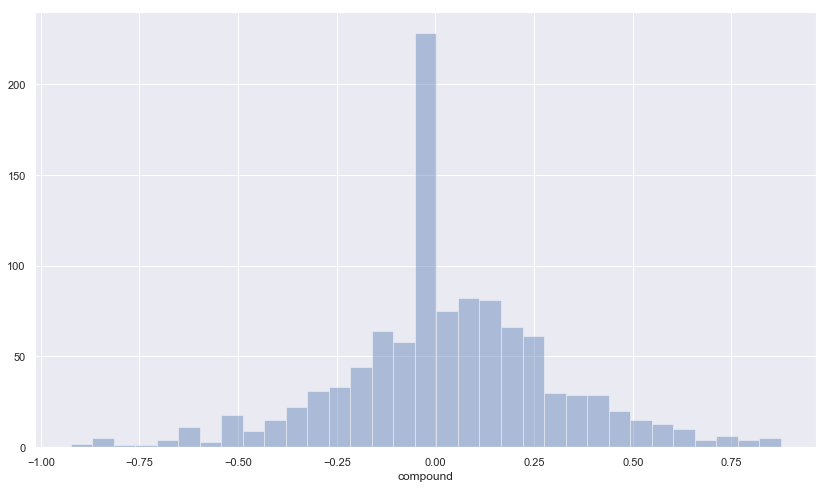

In [35]:
plt.figure(figsize=(14,8))
sns.distplot(mean_table['compound'], kde = False)

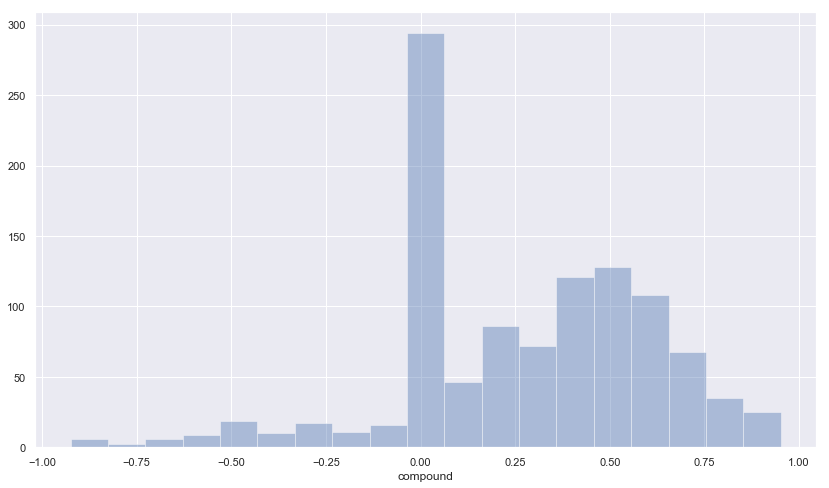

In [36]:
plt.figure(figsize=(14,8))
sns.distplot(max_table['compound'], kde = False)

In [37]:
mean_table.index = pd.to_datetime(mean_table.index)

In [79]:
mean_table['compound(t-1)'] = mean_table['compound'].shift(1).fillna(0)
google_full_table = pd.DataFrame(df_stock['GOOGL']).merge(mean_table, right_on = mean_table.index, left_on = df_stock.index, how = 'left' )
google_full_table = google_full_table.rename(columns = {'key_0':'date'})
google_full_table = google_full_table[google_full_table['date'] >= mean_table.index.min()]
google_full_table = google_full_table.fillna(0)
google_full_table.describe()

,GOOGL,pos,neg,neu,compound,compound(t-1)
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,1134.061502,0.067689,0.062429,0.767224,0.012149,0.027653
std,170.315065,0.073340,0.078864,0.276465,0.238813,0.253825
min,807.770020,0.000000,0.000000,0.000000,-0.909400,-0.924600
25%,1026.112549,0.000000,0.000000,0.761550,-0.091707,-0.072825
50%,1121.000000,0.048875,0.035909,0.846939,0.000000,0.000000
75%,1227.047485,0.105559,0.097938,0.915900,0.132569,0.152850
max,1564.849976,0.625000,0.542000,1.000000,0.875000,0.875000


## Preliminary Predictive Power Exam

In [80]:
google_full_table['daily_return'] = google_full_table['GOOGL'].pct_change()

In [88]:
def modifier(x): 
    if x>0: 
        return 1
    if x< 0: 
        return -1

In [82]:
google_full_table['daily_return_label'] = google_full_table['daily_return'].apply(lambda x: modifier(x))

In [83]:
google_full_table["daily_return_label"] = google_full_table["daily_return_label"].astype('category')

In [84]:
google_full_table.head()

,date,GOOGL,pos,neg,neu,compound,compound(t-1),daily_return,daily_return_label
380,2017-01-03,808.010010,0.0000,0.105000,0.895000,-0.292450,0.00000,NaN,NaN
381,2017-01-04,807.770020,0.1205,0.000000,0.879500,0.329850,-0.29245,-0.000297,-1.0
382,2017-01-05,813.020020,0.0000,0.051714,0.948286,-0.089271,0.32985,0.006499,1.0
383,2017-01-06,825.210022,0.0000,0.000000,0.000000,0.000000,0.00000,0.014993,1.0
384,2017-01-09,827.179993,0.0000,0.000000,1.000000,0.000000,0.47670,0.002387,1.0


In [85]:
pp.score(google_full_table, "compound(t-1)", "daily_return_label")

{'x': 'compound(t-1)',
 'y': 'daily_return_label',
 'ppscore': 0,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.49336283185840707,
 'model_score': 0.477784733380655,
 'model': DecisionTreeClassifier()}

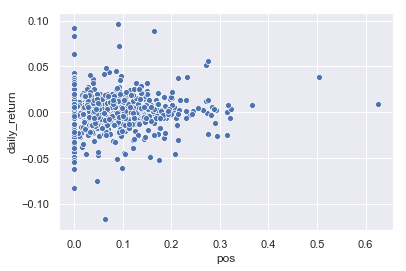

In [55]:
sns.scatterplot(x = 'pos', y = 'daily_return', data = google_full_table )